In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os, yaml

# Country wise counts

A total of 15 remains after thresholding


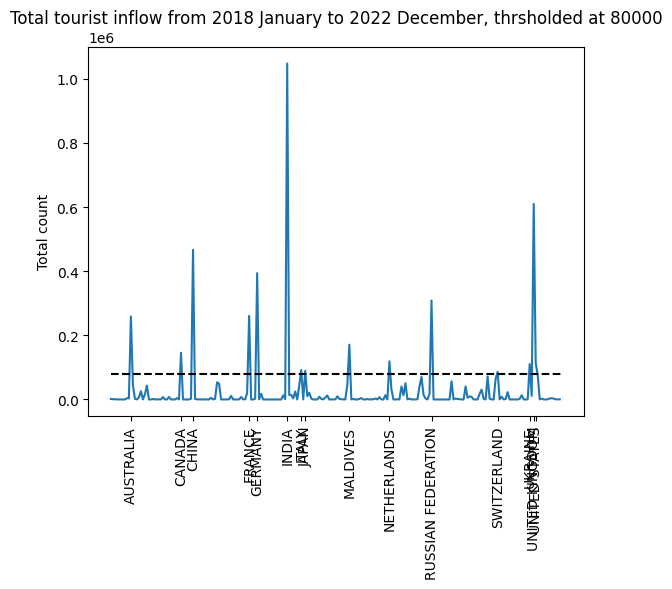

In [2]:
df = pd.read_csv("./data/dataset2.csv")
df = df.dropna()
month_map = ['JANUARY', 'FEBRUARY', 'MARCH', 'APRIL', 'MAY', 'JUNE', 'JULY','AUGUST', 'SEPTEMBER', 'OCTOBER', 'NOVEMBER', 'DECEMBER']
df["month"] = df["month"].apply(lambda month: month_map.index(month))
df["date"] = pd.to_datetime(df.apply(lambda row: f"{int(row['year'])}-{int(row['month'])+1}-15", axis=1))
dmin, dmax = df["date"].min(), df["date"].max()

df["count"] = df["count"].apply(lambda num: int(num.replace(",", "")))
available_countries = df["country"].unique().tolist()
sum = df.groupby("country")["count"].sum()
sum = sum.reset_index()
thresh = 8e4
filt_countries = sum[sum["count"]>=thresh]
print(f"A total of {len(filt_countries)} remains after thresholding")
xticks = filt_countries.index
xtick_labels = filt_countries["country"]

plt.plot(sum["count"])
plt.hlines(thresh, 0, sum.shape[0], "black", "dashed")
plt.title(f"Total tourist inflow from {dmin.year} {dmin.month_name()} to {dmax.year} {dmax.month_name()}, thrsholded at {int(thresh)}")
plt.ylabel("Total count")
plt.xticks(xticks, xtick_labels, rotation=90)
# plt.xticklabels(xtick_labels)
plt.show()

In [3]:
major_country_names = filt_countries["country"].tolist()
major_country_names.remove("MALDIVES")
with open("./data/countries.yaml", "w") as handler:
    yaml.dump({"names": major_country_names}, handler)

# Extract Contextual Data

In [4]:
df1 = pd.read_csv("./data/dataset1.csv")
month_map = ['JANUARY', 'FEBRUARY', 'MARCH', 'APRIL', 'MAY', 'JUNE', 'JULY','AUGUST', 'SEPTEMBER', 'OCTOBER', 'NOVEMBER', 'DECEMBER']
truth_map = ['NO', 'YES']
df1["month"] = df1["month"].apply(lambda month: month_map.index(month))
df1["is_a_global_pandamic"] = df1["is_a_global_pandamic"].apply(lambda truth: bool(truth_map.index(truth)))
df1["is_crisis_situation_sriLanka"] = df1["is_crisis_situation_sriLanka"].apply(lambda truth: bool(truth_map.index(truth)))
# df1 = df1.drop("is_crisis_situation_sriLanka", axis=1)
df1["date"] = pd.to_datetime(df1.apply(lambda row: f"{int(row['year'])}-{int(row['month'])+1}-15", axis=1))
def enc_month(m):
    return np.sin(m/11*2*np.pi-np.pi/2)/2+0.5
df1["month_encoded"] = df1["month"].apply(enc_month)
context_data = df1[["date", "month_encoded", "is_a_global_pandamic", "is_crisis_situation_sriLanka", "inflasion_rate_in_sriLanka", "political_stability_index_value_of_sriLanka", "gdp_annual_growth_rate", "mean_temperature", "precipitation"]]
context_data.columns = ["date", "month_encoded", "is_a_global_pandamic", "is_crisis_situation", "inflasion", "political_stability", "gdp_annual_growth_rate", "mean_temperature", "precipitation"]
dataset_date_range = context_data["date"]
context_data.info()
context_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    60 non-null     datetime64[ns]
 1   month_encoded           60 non-null     float64       
 2   is_a_global_pandamic    60 non-null     bool          
 3   is_crisis_situation     60 non-null     bool          
 4   inflasion               60 non-null     float64       
 5   political_stability     60 non-null     float64       
 6   gdp_annual_growth_rate  60 non-null     float64       
 7   mean_temperature        60 non-null     float64       
 8   precipitation           60 non-null     float64       
dtypes: bool(2), datetime64[ns](1), float64(6)
memory usage: 3.5 KB


,date,month_encoded,is_a_global_pandamic,is_crisis_situation,inflasion,political_stability,gdp_annual_growth_rate,mean_temperature,precipitation
0,2018-01-15,0.000000,False,False,5.8,-0.15,8.0,25.67,115.53
1,2018-02-15,0.079373,False,False,4.5,-0.15,5.7,26.45,98.42
2,2018-03-15,0.292292,False,False,4.2,-0.15,4.4,27.58,76.41
3,2018-04-15,0.571157,False,False,3.8,-0.15,3.7,28.21,146.03
4,2018-05-15,0.827430,False,False,4.0,-0.15,4.1,28.40,128.31


In [5]:
ccpi = pd.read_csv("./data/raw/colombo-cpi.csv")
ccpi["Date"] = pd.to_datetime(ccpi["Date"])
ccpi_useful = ccpi[["Date", "All Items", "Food", "Alchohol", "Clothing", "Housing", "Transport", "Communication","Culture","Restaurants"]]
ccpi_useful.columns = ['date', 'ccpi_all_items', 'ccpi_food', 'ccpi_alchohol', 'ccpi_clothing', 'ccpi_housing', 'ccpi_transport', 'ccpi_communication', 'ccpi_culture', 'ccpi_restaurants']
ccpi = ccpi_useful
ccpi.info()
ccpi.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                108 non-null    datetime64[ns]
 1   ccpi_all_items      108 non-null    float64       
 2   ccpi_food           108 non-null    float64       
 3   ccpi_alchohol       108 non-null    float64       
 4   ccpi_clothing       108 non-null    float64       
 5   ccpi_housing        108 non-null    float64       
 6   ccpi_transport      108 non-null    float64       
 7   ccpi_communication  108 non-null    float64       
 8   ccpi_culture        108 non-null    float64       
 9   ccpi_restaurants    108 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 8.6 KB


,date,ccpi_all_items,ccpi_food,ccpi_alchohol,ccpi_clothing,ccpi_housing,ccpi_transport,ccpi_communication,ccpi_culture,ccpi_restaurants
0,2014-01-15,104.2,100.4,105.3,100.8,110.1,102.2,103.5,101.2,100.8
1,2014-02-15,104.2,100.2,105.4,101.0,110.1,102.2,103.5,101.2,101.2
2,2014-03-15,104.2,99.9,105.4,100.9,110.1,102.2,103.5,101.4,101.2
3,2014-04-15,104.4,100.7,105.4,100.6,110.1,102.2,103.5,101.4,101.2
4,2014-05-15,104.8,102.2,105.5,100.6,110.1,102.2,103.5,101.4,101.2


In [6]:
global_cpi = pd.read_csv("./data/raw/global-cpi.csv")
global_cpi = global_cpi[global_cpi["Frequency"]=="Monthly"]
global_cpi = global_cpi[global_cpi["Measure"]=="2015=100"]
global_cpi = global_cpi[["Country","Subject","TIME","Value"]]
cpi_available_countries = global_cpi["Country"].unique()
# major_country_names = ['Austria', 'Belgium', 'Canada', 'Czech Republic', 'Denmark',
#        'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
#        'Ireland', 'Italy', 'Japan', 'Korea', 'Luxembourg', 'Mexico',
#        'Netherlands', 'Norway', 'Poland', 'Portugal', 'Slovak Republic',
#        'Spain', 'Sweden', 'Switzerland', 'Türkiye', 'United Kingdom',
#        'United States', 'Brazil', 'Chile', "China (People's Republic of)",
#        'Colombia', 'Costa Rica', 'Estonia', 'India', 'Indonesia',
#        'Israel', 'Latvia', 'Lithuania', 'Russia', 'Saudi Arabia',
#        'Slovenia', 'South Africa', "G20"]
country_wise_cpi = []
subjects = global_cpi["Subject"].unique()
for country in cpi_available_countries:
    cpi = global_cpi[global_cpi["Country"]==country].reset_index()
    cpi.drop("Country", axis=1, inplace=True)
    time = cpi["TIME"].unique()
    new_cpi = pd.DataFrame({"TIME": time})
    for sub in subjects:
        df_frag = cpi[cpi["Subject"]==sub][["TIME", "Value"]]
        df_frag.columns = ["TIME", sub]
        new_cpi = new_cpi.merge(df_frag, "left", "TIME")
        new_cpi = new_cpi.interpolate().fillna(method="ffill").fillna(method="bfill")
        
    new_cpi["TIME"] = pd.to_datetime(new_cpi["TIME"]).apply(lambda date: date + pd.DateOffset(day=15))
    new_cpi.columns = ["date", "energy", "food", "country_cpi", "total_less_food_less_energy"]
    new_cpi = new_cpi[["date", "country_cpi"]]

    if country == "China (People's Republic of)":
        country_wise_cpi.append({"country":"CHINA", "df":new_cpi})
    if country == "Russia":
        country_wise_cpi.append({"country":"RUSSIAN FEDERATION", "df":new_cpi})
    if country == "G20":
        country_wise_cpi.append({"country":"UKRAINE", "df":new_cpi})
        country_wise_cpi.append({"country":"AUSTRALIA", "df":new_cpi})
    else:
        country = country.upper()
        if country in major_country_names:
            country_wise_cpi.append({"country":country, "df":new_cpi})
    

os.makedirs("./data/global-cpi/", exist_ok=True)
# major_country_names = {"names":[]}
for cpi_obj in country_wise_cpi:
    country, df = cpi_obj["country"], cpi_obj["df"]
    # major_country_names['names'].append(country)
    save_path = f"./data/global-cpi/{country}.csv"
    df.to_csv(save_path, index=False)

# with open("./data/global-cpi/countries.yaml", "w") as handler:
#     yaml.dump(major_country_names, handler)

In [7]:
sl_fp = pd.read_csv("./data/raw/sri-lankan-fuel-price.csv")
sl_fp = sl_fp[["Date", "LP 92", "LP 95", "LAD", "LSD"]]
sl_fp["Date"] = pd.to_datetime(sl_fp["Date"], format="%d.%m.%Y")
date_range = pd.date_range(sl_fp["Date"].min(), sl_fp["Date"].max())
filled_sl_fp = pd.DataFrame({"Date": date_range})
filled_sl_fp = filled_sl_fp.merge(sl_fp, "left", "Date")
filled_sl_fp = filled_sl_fp.fillna(method="ffill")
sl_fp = pd.DataFrame({"Date": dataset_date_range})
sl_fp = sl_fp.merge(filled_sl_fp, "left", "Date")
sl_fp.columns = ["date", "fp_lp_92", "fp_lp_95", "fp_lad", "fp_lsd"]
sl_fp["fp_lp_92"] = sl_fp["fp_lp_92"].apply(lambda val: float(val.rstrip(".00")))
sl_fp.info()
sl_fp.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      60 non-null     datetime64[ns]
 1   fp_lp_92  60 non-null     float64       
 2   fp_lp_95  60 non-null     float64       
 3   fp_lad    60 non-null     float64       
 4   fp_lsd    60 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.5 KB


,date,fp_lp_92,fp_lp_95,fp_lad,fp_lsd
0,2018-01-15,117.0,128.0,95.0,110.0
1,2018-02-15,117.0,128.0,95.0,110.0
2,2018-03-15,117.0,128.0,95.0,110.0
3,2018-04-15,117.0,128.0,95.0,110.0
4,2018-05-15,137.0,148.0,109.0,119.0


In [8]:
usd_price = pd.read_csv("./data/raw/USD_LKR Historical Data.csv")[["Date", "Price"]]
usd_price["Date"] = pd.to_datetime(usd_price["Date"])
date_range = pd.date_range(usd_price["Date"].min(), usd_price["Date"].max())
usd_price_filled = pd.DataFrame({"Date":date_range})
usd_price_filled = usd_price_filled.merge(usd_price, "left", "Date")
usd_price_filled = usd_price_filled.fillna(method="ffill").fillna(method="bfill")
usd_price = pd.DataFrame({"Date":dataset_date_range})
usd_price = usd_price.merge(usd_price_filled, "left", "Date")
usd_price.columns = ["date", "usd_price"]
usd_price.info()
usd_price.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       60 non-null     datetime64[ns]
 1   usd_price  60 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB


,date,usd_price
0,2018-01-15,153.950
1,2018-02-15,154.925
2,2018-03-15,156.050
3,2018-04-15,155.675
4,2018-05-15,158.100


In [9]:
ccpi, sl_fp, usd_price
context_data = context_data.merge(ccpi, "left", "date")
context_data = context_data.merge(sl_fp, "left", "date")
context_data = context_data.merge(usd_price, "left", "date")
context_data.info()
context_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    60 non-null     datetime64[ns]
 1   month_encoded           60 non-null     float64       
 2   is_a_global_pandamic    60 non-null     bool          
 3   is_crisis_situation     60 non-null     bool          
 4   inflasion               60 non-null     float64       
 5   political_stability     60 non-null     float64       
 6   gdp_annual_growth_rate  60 non-null     float64       
 7   mean_temperature        60 non-null     float64       
 8   precipitation           60 non-null     float64       
 9   ccpi_all_items          60 non-null     float64       
 10  ccpi_food               60 non-null     float64       
 11  ccpi_alchohol           60 non-null     float64       
 12  ccpi_clothing           60 non-null     float64     

,date,month_encoded,is_a_global_pandamic,is_crisis_situation,inflasion,political_stability,gdp_annual_growth_rate,mean_temperature,precipitation,ccpi_all_items,...,ccpi_housing,ccpi_transport,ccpi_communication,ccpi_culture,ccpi_restaurants,fp_lp_92,fp_lp_95,fp_lad,fp_lsd,usd_price
0,2018-01-15,0.000000,False,False,5.8,-0.15,8.0,25.67,115.53,122.8,...,110.5,99.0,119.2,111.9,123.6,117.0,128.0,95.0,110.0,153.950
1,2018-02-15,0.079373,False,False,4.5,-0.15,5.7,26.45,98.42,121.9,...,110.6,98.9,119.2,111.9,123.6,117.0,128.0,95.0,110.0,154.925
2,2018-03-15,0.292292,False,False,4.2,-0.15,4.4,27.58,76.41,121.4,...,110.7,98.9,119.2,111.9,123.6,117.0,128.0,95.0,110.0,156.050
3,2018-04-15,0.571157,False,False,3.8,-0.15,3.7,28.21,146.03,121.5,...,110.7,100.4,119.2,112.6,123.6,117.0,128.0,95.0,110.0,155.675
4,2018-05-15,0.827430,False,False,4.0,-0.15,4.1,28.40,128.31,122.9,...,111.4,101.9,119.2,112.6,123.6,137.0,148.0,109.0,119.0,158.100


In [10]:
context_data.to_csv("./data/contextual-data.csv", index=False)

# Overall Count

In [11]:

df2 = pd.read_csv("./data/dataset2.csv")
df2["date"] = pd.to_datetime(df2.apply(lambda row: f"{row['year']}-{month_map.index(row['month'])+1}-15", axis=1))
tourist_df = df2[["date", "country", "count"]]
tourist_df = tourist_df.dropna()
tourist_df["count"] = tourist_df["count"].apply(lambda count: int(str(count).replace(",","")))

country_dfs = []
for i, country in enumerate(major_country_names):
    country_cpi = [cpi for cpi in country_wise_cpi if cpi["country"]==country][0]["df"]
    country_records = tourist_df[tourist_df["country"]==country]
    country_df = country_records.merge(country_cpi, how="left", on="date")
    country_df.fillna(method="ffill", inplace=True)
    country_df.fillna(method="bfill", inplace=True)
    country_dfs.append(country_df)

tourist_df = pd.concat(country_dfs)
tourist_df.to_csv("./data/total-tourist-count.csv", index=False)